In [ ]:
import sys
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import zscore_transform, zscore_inverse_transform, get_tsc_train_dataset, check_normalization_quality
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Download latest version
path = kagglehub.dataset_download("malekzadeh/motionsense-dataset")
print("Path to dataset files:", path)

In [20]:
data_dir = f'{path}/A_DeviceMotion_data'

In [21]:
df_subjects = pd.read_csv(f'{path}/data_subjects_info.csv')
df_subjects.head()

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0


In [22]:
def plot_sensor_data(dataframe, title_prefix="", figsize=(15, 12)):
    """
    Plot all sensor data columns from a motion sensor dataframe.
    
    Parameters:
    dataframe: pandas DataFrame with sensor data
    title_prefix: string to add before each subplot title
    figsize: tuple for figure size
    """
    # Create subplots for each column (excluding the index column)
    fig, axes = plt.subplots(4, 3, figsize=figsize)
    axes = axes.flatten()
    
    # Get all columns except the first one (Unnamed: 0)
    columns_to_plot = dataframe.columns[1:]
    
    for i, column in enumerate(columns_to_plot):
        axes[i].plot(dataframe[column])
        axes[i].set_title(f"{title_prefix}{column}")
        axes[i].set_xlabel('Sample')
        axes[i].set_ylabel('Value')
    
    plt.tight_layout()
    plt.show()

# Dataset extraction

In [23]:
def split_window_data(dataframe, top_features, window_size=120, step_size=40):
    """
    Split the dataframe into overlapping windows.
    
    Parameters:
    dataframe: pandas DataFrame with sensor data
    window_size: size of each window
    step_size: step size for sliding window
    
    Returns:
    list of DataFrames, each representing a window
    """
    windows = []
    dataframe = dataframe[top_features]
    for start in range(0, len(dataframe) - window_size + 1, step_size):
        end = start + window_size
        df = dataframe.iloc[start:end]
        data = df.values
        windows.append(data)
    return np.array(windows)

total_samples = 0
total_missing_values = 0
x_total = []
y_total = []
dfs = []
for dir in os.listdir(f"{data_dir}/A_DeviceMotion_data"):
    label = dir.split('_')[0]
    for file in os.listdir(f"{data_dir}/A_DeviceMotion_data/{dir}"):
        if file.endswith('.csv'):
            df = pd.read_csv(f"{data_dir}/A_DeviceMotion_data/{dir}/{file}")
            df["Label"] = label
            dfs.append(df)
            missing_values = df.isnull().sum().sum()
            total_missing_values += missing_values
            if missing_values > 0:
                print(f"  Missing values: {missing_values}")
            top_features = ['attitude.pitch', 'userAcceleration.y', 'gravity.y', 'rotationRate.x', 'userAcceleration.z', 'rotationRate.z', 'gravity.z', 'rotationRate.y']
            windows = split_window_data(df, window_size=120, 
                                        step_size=60, 
                                        top_features=top_features)
            if len(windows) > 0:
                x_total.extend(windows)
                y_total.extend([label] * len(windows))
                total_samples += len(windows)

x_total = np.array(x_total)
y_total = np.array(y_total)

In [24]:
x_total.shape, y_total.shape

((23020, 120, 8), (23020,))

In [25]:
np.unique(y_total, return_counts=True)

(array(['dws', 'jog', 'sit', 'std', 'ups', 'wlk'], dtype='<U3'),
 array([2093, 2170, 5574, 5036, 2516, 5631]))

In [26]:
label_encoder = LabelEncoder()
y_total_encoded = label_encoder.fit_transform(y_total)
print("Encoded labels:", y_total_encoded)
print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded labels: [0 0 0 ... 5 5 5]
Label mapping: {np.str_('dws'): np.int64(0), np.str_('jog'): np.int64(1), np.str_('sit'): np.int64(2), np.str_('std'): np.int64(3), np.str_('ups'): np.int64(4), np.str_('wlk'): np.int64(5)}


In [27]:
x_total.shape

(23020, 120, 8)

In [ ]:
root_path = "<path>/datasets/MotionSense"
utils_path = os.path.join(root_path, "utils")
original_data_path = os.path.join(root_path, "original_data")

In [29]:
np.save(os.path.join(utils_path, "label_encoder.npy"), label_encoder.classes_)

# Feature selection

Training Random Forest on Motion Sensor Data...
Preparing data...
DataFrame shape: (1412865, 14)
Columns: ['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z', 'Label']
Feature matrix shape: (1412865, 12)
Labels shape: (1412865,)
Unique labels: ['dws' 'jog' 'sit' 'std' 'ups' 'wlk']
Label mapping: {'dws': 0, 'jog': 1, 'sit': 2, 'std': 3, 'ups': 4, 'wlk': 5}
Training set: (1130292, 12), (1130292,)
Test set: (282573, 12), (282573,)

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.0s finished



Model Performance:
Accuracy: 0.9329

Classification Report:
              precision    recall  f1-score   support

         dws       0.85      0.76      0.80     26371
         jog       0.91      0.89      0.90     26846
         sit       1.00      1.00      1.00     67756
         std       0.99      0.99      0.99     61285
         ups       0.86      0.81      0.83     31457
         wlk       0.88      0.96      0.92     68858

    accuracy                           0.93    282573
   macro avg       0.92      0.90      0.91    282573
weighted avg       0.93      0.93      0.93    282573



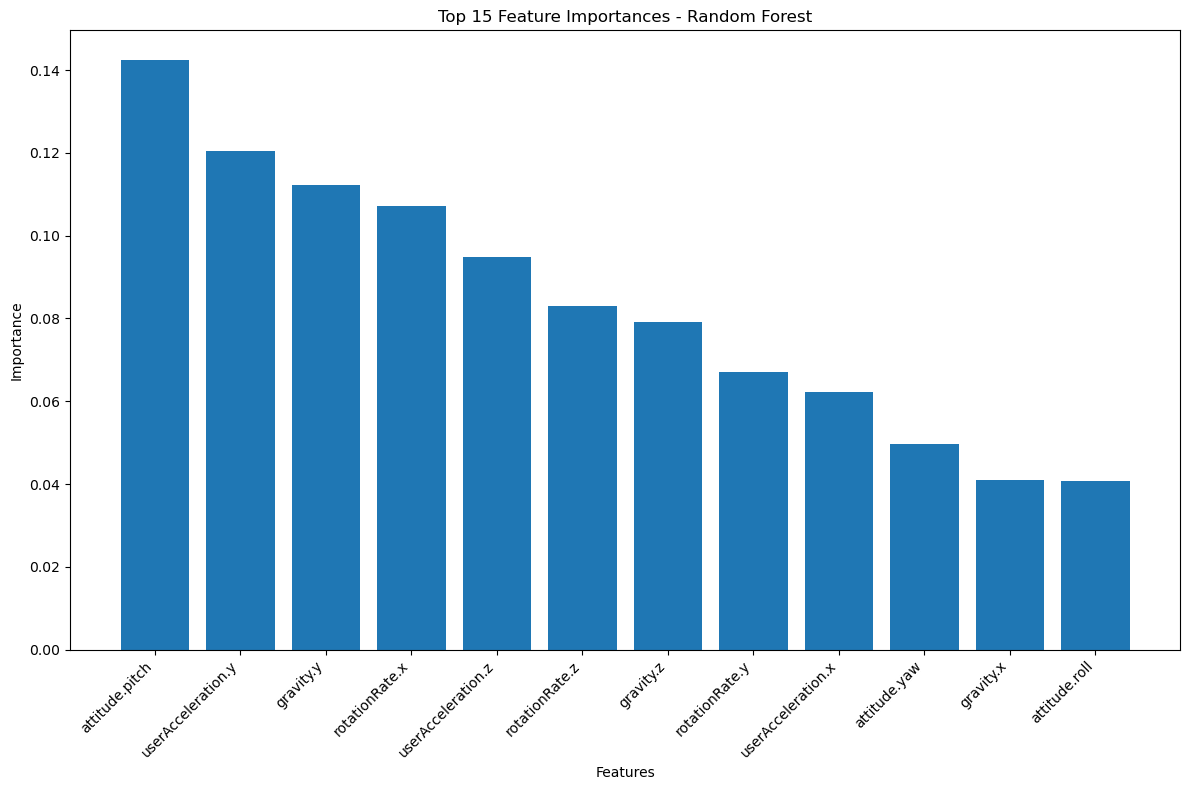


Top 15 Most Important Features:
 1. attitude.pitch           : 0.1425
 2. userAcceleration.y       : 0.1206
 3. gravity.y                : 0.1122
 4. rotationRate.x           : 0.1072
 5. userAcceleration.z       : 0.0948
 6. rotationRate.z           : 0.0829
 7. gravity.z                : 0.0791
 8. rotationRate.y           : 0.0670
 9. userAcceleration.x       : 0.0622
10. attitude.yaw             : 0.0497
11. gravity.x                : 0.0411
12. attitude.roll            : 0.0407


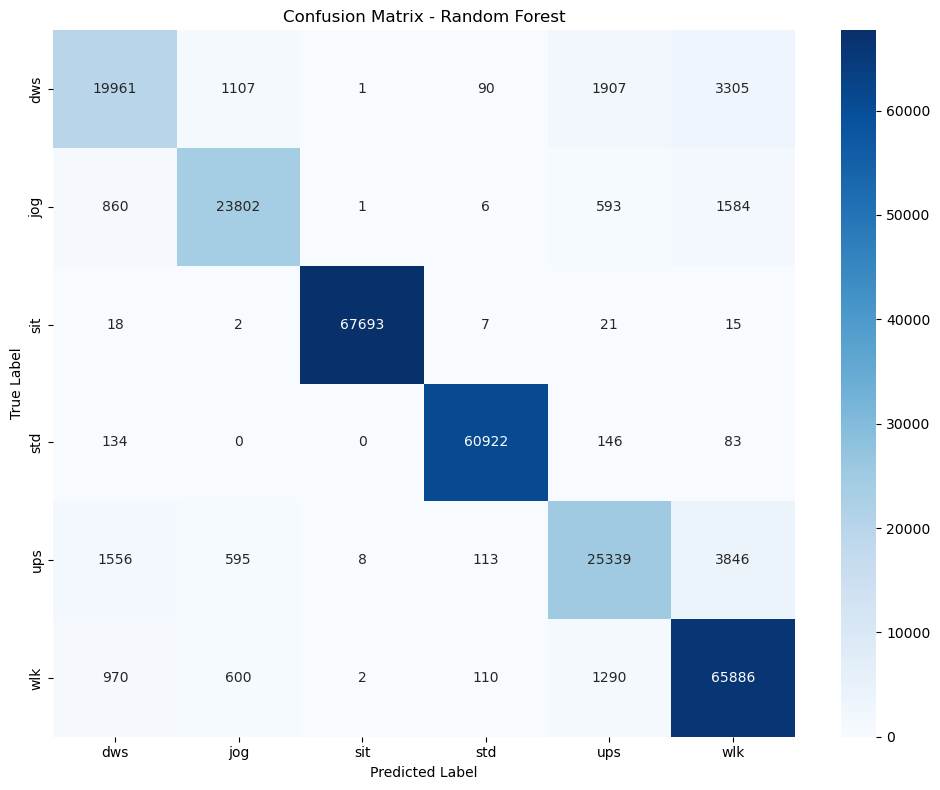


Per-Class Performance:
Class           Precision  Recall     F1-Score   Support   
-----------------------------------------------------------------
dws             0.8494     0.7569     0.8005     26371     
jog             0.9117     0.8866     0.8990     26846     
sit             0.9998     0.9991     0.9994     67756     
std             0.9947     0.9941     0.9944     61285     
ups             0.8649     0.8055     0.8342     31457     
wlk             0.8818     0.9568     0.9178     68858     


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def train_random_forest_on_dfs(dfs, test_size=0.2, random_state=42):
    """
    Train a Random Forest classifier on the motion sensor dataframe
    
    Parameters:
    dfs: pandas DataFrame with sensor data and labels
    test_size: fraction of data to use for testing
    random_state: random seed for reproducibility
    
    Returns:
    rf_model: trained Random Forest model
    X_test, y_test: test data for evaluation
    feature_names: list of feature names
    """
    
    # Prepare the data
    print("Preparing data...")
    print(f"DataFrame shape: {dfs.shape}")
    print(f"Columns: {list(dfs.columns)}")
    
    # Separate features and labels
    # Exclude the first column (index) and the Label column
    feature_columns = [col for col in dfs.columns if col not in ['Unnamed: 0', 'Label']]
    X = dfs[feature_columns].values
    y = dfs['Label'].values
    
    print(f"Feature matrix shape: {X.shape}")
    print(f"Labels shape: {y.shape}")
    print(f"Unique labels: {np.unique(y)}")
    
    # Encode string labels to numbers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    print(f"Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
    )
    
    print(f"Training set: {X_train.shape}, {y_train.shape}")
    print(f"Test set: {X_test.shape}, {y_test.shape}")
    
    # Train Random Forest
    print("\nTraining Random Forest...")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=random_state,
        verbose=2,
        n_jobs=-1  # Use all available cores
    )
    
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    return rf_model, X_test, y_test, y_pred, label_encoder, feature_columns

def plot_feature_importance(rf_model, feature_names, top_n=15):
    """
    Plot feature importance from Random Forest model
    """
    # Get feature importances
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Select top N features
    top_indices = indices[:top_n]
    top_importances = importances[top_indices]
    top_features = [feature_names[i] for i in top_indices]
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.title(f'Top {top_n} Feature Importances - Random Forest')
    plt.bar(range(len(top_importances)), top_importances)
    plt.xticks(range(len(top_importances)), top_features, rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()
    
    # Print top features
    print(f"\nTop {top_n} Most Important Features:")
    for i, (idx, importance) in enumerate(zip(top_indices, top_importances)):
        print(f"{i+1:2d}. {feature_names[idx]:25s}: {importance:.4f}")

def plot_confusion_matrix(y_test, y_pred, label_encoder):
    """
    Plot confusion matrix
    """
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix - Random Forest')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

def evaluate_per_class_performance(y_test, y_pred, label_encoder):
    """
    Evaluate performance for each class
    """
    from sklearn.metrics import precision_recall_fscore_support
    
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average=None
    )
    
    print("\nPer-Class Performance:")
    print(f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("-" * 65)
    
    for i, class_name in enumerate(label_encoder.classes_):
        print(f"{class_name:<15} {precision[i]:<10.4f} {recall[i]:<10.4f} "
              f"{f1[i]:<10.4f} {support[i]:<10}")

# Train the model
print("Training Random Forest on Motion Sensor Data...")
rf_model, X_test, y_test, y_pred, label_encoder, feature_names = train_random_forest_on_dfs(dfs)

# Plot results
plot_feature_importance(rf_model, feature_names, top_n=15)
plot_confusion_matrix(y_test, y_pred, label_encoder)
evaluate_per_class_performance(y_test, y_pred, label_encoder)

In [ ]:
dfs.head()

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Label
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,dws
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,dws
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,dws
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,dws
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,dws


In [ ]:
# pick 6 most important features
top_features = ["attitude.pitch", "userAcceleration.y", "gravity.y", "rotationRate.x", "userAcceleration.z", "rotationRate.z", "gravity.z", "rotationRate.y"]
top_features_df = dfs[top_features + ['Label']].copy()

In [ ]:
top_features_df

,attitude.pitch,userAcceleration.y,gravity.y,rotationRate.x,userAcceleration.z,rotationRate.z,gravity.z,rotationRate.y,Label
0,-0.733896,-0.184493,0.669768,0.316738,0.377542,1.082764,-0.031672,0.778180,dws
1,-0.716987,0.035846,0.657116,0.842032,0.114866,0.643574,-0.032255,0.424446,dws
2,-0.706999,0.134701,0.649555,-0.138143,-0.167808,0.343563,-0.032707,-0.040741,dws
3,-0.704678,0.136788,0.647788,-0.025005,0.094958,0.035860,-0.041140,-1.048717,dws
4,-0.703918,0.353996,0.647210,0.114253,-0.044299,0.047341,-0.058530,-0.912890,dws
...,...,...,...,...,...,...,...,...,...
1412860,-1.300928,-0.204574,0.963806,-0.920226,0.204906,-0.383194,-0.167690,0.406762,wlk
1412861,-1.319499,-0.222604,0.968591,-0.923594,0.225136,-0.521862,-0.148750,0.231559,wlk
1412862,-1.340284,-0.054040,0.973550,-0.970054,0.240632,-0.621238,-0.129883,0.003083,wlk
1412863,-1.362495,-0.003927,0.978384,-1.005371,0.194735,-0.708937,-0.110827,-0.108297,wlk


In [ ]:
train_random_forest_on_dfs(top_features_df, test_size=0.2, random_state=42)

Preparing data...
DataFrame shape: (1412865, 9)
Columns: ['attitude.pitch', 'userAcceleration.y', 'gravity.y', 'rotationRate.x', 'userAcceleration.z', 'rotationRate.z', 'gravity.z', 'rotationRate.y', 'Label']
Feature matrix shape: (1412865, 8)
Labels shape: (1412865,)
Unique labels: ['dws' 'jog' 'sit' 'std' 'ups' 'wlk']
Label mapping: {'dws': 0, 'jog': 1, 'sit': 2, 'std': 3, 'ups': 4, 'wlk': 5}
Training set: (1130292, 8), (1130292,)
Test set: (282573, 8), (282573,)

Training Random Forest...
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.8s



Model Performance:
Accuracy: 0.8805

Classification Report:
              precision    recall  f1-score   support

         dws       0.72      0.60      0.65     26371
         jog       0.86      0.81      0.83     26846
         sit       1.00      1.00      1.00     67756
         std       0.99      0.99      0.99     61285
         ups       0.75      0.67      0.71     31457
         wlk       0.79      0.90      0.84     68858

    accuracy                           0.88    282573
   macro avg       0.85      0.83      0.84    282573
weighted avg       0.88      0.88      0.88    282573



[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.4s finished


(RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2),
 array([[-1.268729, -0.007443,  0.954723, ..., -0.012179,  0.018739,
         -0.083174],
        [-1.316997, -0.010797,  0.967965, ...,  0.04191 , -0.207684,
         -0.28873 ],
        [-0.472736,  0.020354,  0.455324, ...,  0.007911, -0.876928,
         -0.024106],
        ...,
        [-1.395024,  0.016888,  0.984592, ...,  0.016182,  0.173747,
          0.045556],
        [-1.131992, -0.011385,  0.90526 , ...,  2.126609, -0.269716,
          0.179336],
        [-1.050388, -0.624941,  0.867616, ...,  0.509415, -0.487393,
         -1.280783]]),
 array([3, 0, 2, ..., 3, 4, 5]),
 array([3, 3, 2, ..., 3, 4, 5]),
 LabelEncoder(),
 ['attitude.pitch',
  'userAcceleration.y',
  'gravity.y',
  'rotationRate.x',
  'userAcceleration.z',
  'rotationRate.z',
  'gravity.z',
  'rotationRate.y'])

# Not scaled the samples

In [30]:
data_path = os.path.join(root_path, "train_test_np")

In [34]:
from sklearn.model_selection import train_test_split
X_sp, X_atk, y_sp, y_atk = train_test_split(
    x_total, y_total_encoded, test_size=0.2, random_state=42, stratify=y_total_encoded
)
X_sp_train, X_sp_test, y_sp_train, y_sp_test = train_test_split(
    X_sp, y_sp, test_size=0.2, random_state=42, stratify=y_sp
)
X_atk_train, X_atk_test, y_atk_train, y_atk_test = train_test_split(
    X_atk, y_atk, test_size=0.2, random_state=42, stratify=y_atk
)

In [35]:
print(f"X_atk_train shape: {X_atk_train.shape}, y_atk_train shape: {y_atk_train.shape}, {np.unique(y_atk_train, return_counts=True)}")
print(f"X_atk_test shape: {X_atk_test.shape}, y_atk_test shape: {y_atk_test.shape}, {np.unique(y_atk_test, return_counts=True)}")
print(f"X_sp_train shape: {X_sp_train.shape}, y_sp_train shape: {y_sp_train.shape}, {np.unique(y_sp_train, return_counts=True)}")
print(f"X_sp_test shape: {X_sp_test.shape}, y_sp_test shape: {y_sp_test.shape}, {np.unique(y_sp_test, return_counts=True)}")

X_atk_train shape: (3683, 120, 8), y_atk_train shape: (3683,), (array([0, 1, 2, 3, 4, 5]), array([335, 347, 892, 806, 402, 901]))
X_atk_test shape: (921, 120, 8), y_atk_test shape: (921,), (array([0, 1, 2, 3, 4, 5]), array([ 84,  87, 223, 201, 101, 225]))
X_sp_train shape: (14732, 120, 8), y_sp_train shape: (14732,), (array([0, 1, 2, 3, 4, 5]), array([1339, 1389, 3567, 3223, 1610, 3604]))
X_sp_test shape: (3684, 120, 8), y_sp_test shape: (3684,), (array([0, 1, 2, 3, 4, 5]), array([335, 347, 892, 806, 403, 901]))


In [36]:
np.save(os.path.join(data_path, "X_train_atk.npy"), X_atk_train)
np.save(os.path.join(data_path, "y_train_atk.npy"), y_atk_train)
np.save(os.path.join(data_path, "X_test_atk.npy"), X_atk_test)
np.save(os.path.join(data_path, "y_test_atk.npy"), y_atk_test)

np.save(os.path.join(data_path, "X_train_sp.npy"), X_sp_train)
np.save(os.path.join(data_path, "y_train_sp.npy"), y_sp_train)
np.save(os.path.join(data_path, "X_test_sp.npy"), X_sp_test)
np.save(os.path.join(data_path, "y_test_sp.npy"), y_sp_test)

np.save(os.path.join(original_data_path, "X_total.npy"), x_total)
np.save(os.path.join(original_data_path, "y_total.npy"), y_total)

# Scaled the samples

In [ ]:
data_path = os.path.join(root_path, "scaled_train_test_np")

In [ ]:
x_total_scaled = zscore_transform(x_total, save_path=os.path.join(utils_path, "zscore_params.npz"))

In [ ]:
x_rescaled = zscore_inverse_transform(x_total_scaled, params_path=os.path.join(utils_path, "zscore_params.npz"))
# Check normalization quality
check_normalization_quality(x_total, x_total_scaled, params_path=os.path.join(utils_path, "zscore_params.npz"))

In [ ]:
# Split the scaled data into different sets
from sklearn.model_selection import train_test_split
X_sp_scaled, X_users_scaled, y_sp_scaled, y_users_scaled = train_test_split(
    x_total_scaled, y_total_encoded, test_size=0.4, random_state=42, stratify=y_total_encoded
)
X_other_users_scaled, X_atk_scaled, y_other_users_scaled, y_atk_scaled = train_test_split(
    X_users_scaled, y_users_scaled, test_size=0.2, random_state=42, stratify=y_users_scaled
)
X_sp_train, X_sp_test, y_sp_train, y_sp_test = train_test_split(
    X_sp_scaled, y_sp_scaled, test_size=0.1, random_state=42, stratify=y_sp_scaled
)
X_atk_train, X_atk_test, y_atk_train, y_atk_test = train_test_split(
    X_atk_scaled, y_atk_scaled, test_size=0.1, random_state=42, stratify=y_atk_scaled
)

print(f"X_atk_train shape: {X_atk_train.shape}, y_atk_train shape: {y_atk_train.shape}")
print(f"X_atk_test shape: {X_atk_test.shape}, y_atk_test shape: {y_atk_test.shape}")
print(f"X_sp_train shape: {X_sp_train.shape}, y_sp_train shape: {y_sp_train.shape}")
print(f"X_sp_test shape: {X_sp_test.shape}, y_sp_test shape: {y_sp_test.shape}")
print(f"X_other_users_scaled shape: {X_other_users_scaled.shape}, y_other_users_scaled shape: {y_other_users_scaled.shape}")

In [ ]:
np.unique(y_sp_train, return_counts=True), np.unique(y_sp_test, return_counts=True), \
np.unique(y_atk_train, return_counts=True), np.unique(y_atk_test, return_counts=True), \
np.unique(y_other_users_scaled, return_counts=True)

In [ ]:
# Save the data
np.save(f"{data_path}/X_sp_train.npy", X_sp_train)
np.save(f"{data_path}/y_sp_train.npy", y_sp_train)
np.save(f"{data_path}/X_sp_test.npy", X_sp_test)
np.save(f"{data_path}/y_sp_test.npy", y_sp_test)
np.save(f"{data_path}/X_other_users_scaled.npy", X_other_users_scaled)
np.save(f"{data_path}/y_other_users_scaled.npy", y_other_users_scaled)
np.save(f"{data_path}/X_atk_train.npy", X_atk_train)
np.save(f"{data_path}/y_atk_train.npy", y_atk_train)
np.save(f"{data_path}/X_atk_test.npy", X_atk_test)
np.save(f"{data_path}/y_atk_test.npy", y_atk_test)

In [ ]:
np.save(f"{os.path.join(root_path, "original_data")}/x_total.npy", x_total)
np.save(f"{os.path.join(root_path, "original_data")}/y_total.npy", y_total)

In [ ]:
x_train, y_train, x_test, y_test = get_tsc_train_dataset("MotionSense", "sp")
print("x_train:", x_train.shape, "y_train:", y_train[:5])

In [ ]:
x_train, y_train, x_test, y_test = get_tsc_train_dataset("MotionSense", "atk")
print("x_train:", x_train.shape, "y_train:", y_train[:5])